# Exploratory Data Analysis (EDA) on Pima Indians Diabetes Dataset


## Giới thiệu
Bộ dữ liệu Pima Indians Diabetes chứa thông tin y tế của phụ nữ người Mỹ gốc Pima, nhằm dự đoán khả năng mắc bệnh tiểu đường dựa trên các chỉ số sinh học.

Mục tiêu của bài toán là xây dựng mô hình Machine Learning để phân loại nguy cơ tiểu đường (Outcome = 1 hoặc 0) dựa trên các biến như Glucose, Insulin, BMI, Age, v.v.

Trước khi huấn luyện mô hình, chúng ta thực hiện bước phân tích khám phá dữ liệu (EDA) để hiểu rõ cấu trúc, phân bố, và mối liên hệ giữa các biến.


## Khởi tạo thư viện cần thiết

Trong bước phân tích dữ liệu khám phá (EDA), chúng ta sử dụng các thư viện phổ biến của Python để xử lý, trực quan hóa và phân tích dữ liệu:

- `pandas`: xử lý dữ liệu dạng bảng (DataFrame)
- `numpy`: hỗ trợ tính toán số học
- `matplotlib.pyplot`: vẽ biểu đồ cơ bản
- `seaborn`: trực quan hóa nâng cao, hỗ trợ biểu đồ đẹp và dễ đọc


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Khám phá dữ liệu

### Load dữ liệu

Chúng ta bắt đầu bằng cách tải bộ dữ liệu Pima Indians Diabetes từ file `diabetes.csv` vào một DataFrame sử dụng thư viện `pandas`.


In [65]:
# --- 1. Load Data ---
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Thông tin tổng quan về dữ liệu

- Số dòng: 768
- Số cột: 9
- Biến mục tiêu: `Outcome` (0: không tiểu đường, 1: có tiểu đường)
- Các biến đặc trưng:
  - `Pregnancies`: Số lần mang thai
  - `Glucose`: Mức đường huyết
  - `BloodPressure`: Huyết áp
  - `SkinThickness`: Độ dày da
  - `Insulin`: Mức insulin
  - `BMI`: Chỉ số khối cơ thể
  - `DiabetesPedigreeFunction`: Chỉ số di truyền tiểu đường
  - `Age`: Tuổi


### Tóm tắt dữ liệu

In [66]:
# --- 2. Data Summary ---
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Kết quả cho thấy:

- Dữ liệu gồm 768 dòng và 9 cột
- Không có giá trị NaN (null) theo `info()`, nhưng có thể tồn tại giá trị bất thường như 0 ở các cột như Glucose, Insulin, BMI,...
- Tất cả các cột đều có kiểu dữ liệu số (`int64` hoặc `float64`) → phù hợp cho phân tích thống kê và mô hình hóa

→ Tiếp theo, chúng ta sẽ kiểm tra thống kê mô tả để hiểu phân bố dữ liệu.


### Thống kê mô tả dữ liệu

In [67]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### Kiểm tra dữ liệu thiếu và giá trị bằng 0

Một số cột trong bộ dữ liệu có thể chứa giá trị bằng 0, vốn không hợp lý về mặt y học (ví dụ: Glucose = 0).  
Ta sẽ thay thế các giá trị 0 bằng `NaN` để xử lý như dữ liệu thiếu, và kiểm tra số lượng missing values trước khi xử lý.


In [68]:
# --- 4. Kiểm tra missing & zero values ---
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("Missing values trước khi xử lý:")
print(df.isnull().sum())

# # Thay thế giá trị 0 bằng NaN
# df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("\nMissing values sau khi thay thế giá trị 0:")
print(df.isnull().sum())


Missing values trước khi xử lý:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values sau khi thay thế giá trị 0:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Phân tích đơn biến
Ở bước này, chúng ta trực quan hóa phân bố của từng biến trong bộ dữ liệu bằng biểu đồ histogram.  
Mục tiêu là kiểm tra:

- Phân bố của từng biến (chuẩn, lệch trái/phải, đa đỉnh,...)
- Giá trị bất thường hoặc cực trị
- Cân nhắc biến đổi dữ liệu nếu cần (log, chuẩn hóa,...)

Mục đích: Để biết các biến nào phân bố như thế nào. phát hiện lệch hay mất cân bằng, xác định vấn đề cần xử lý trước khi modeling.

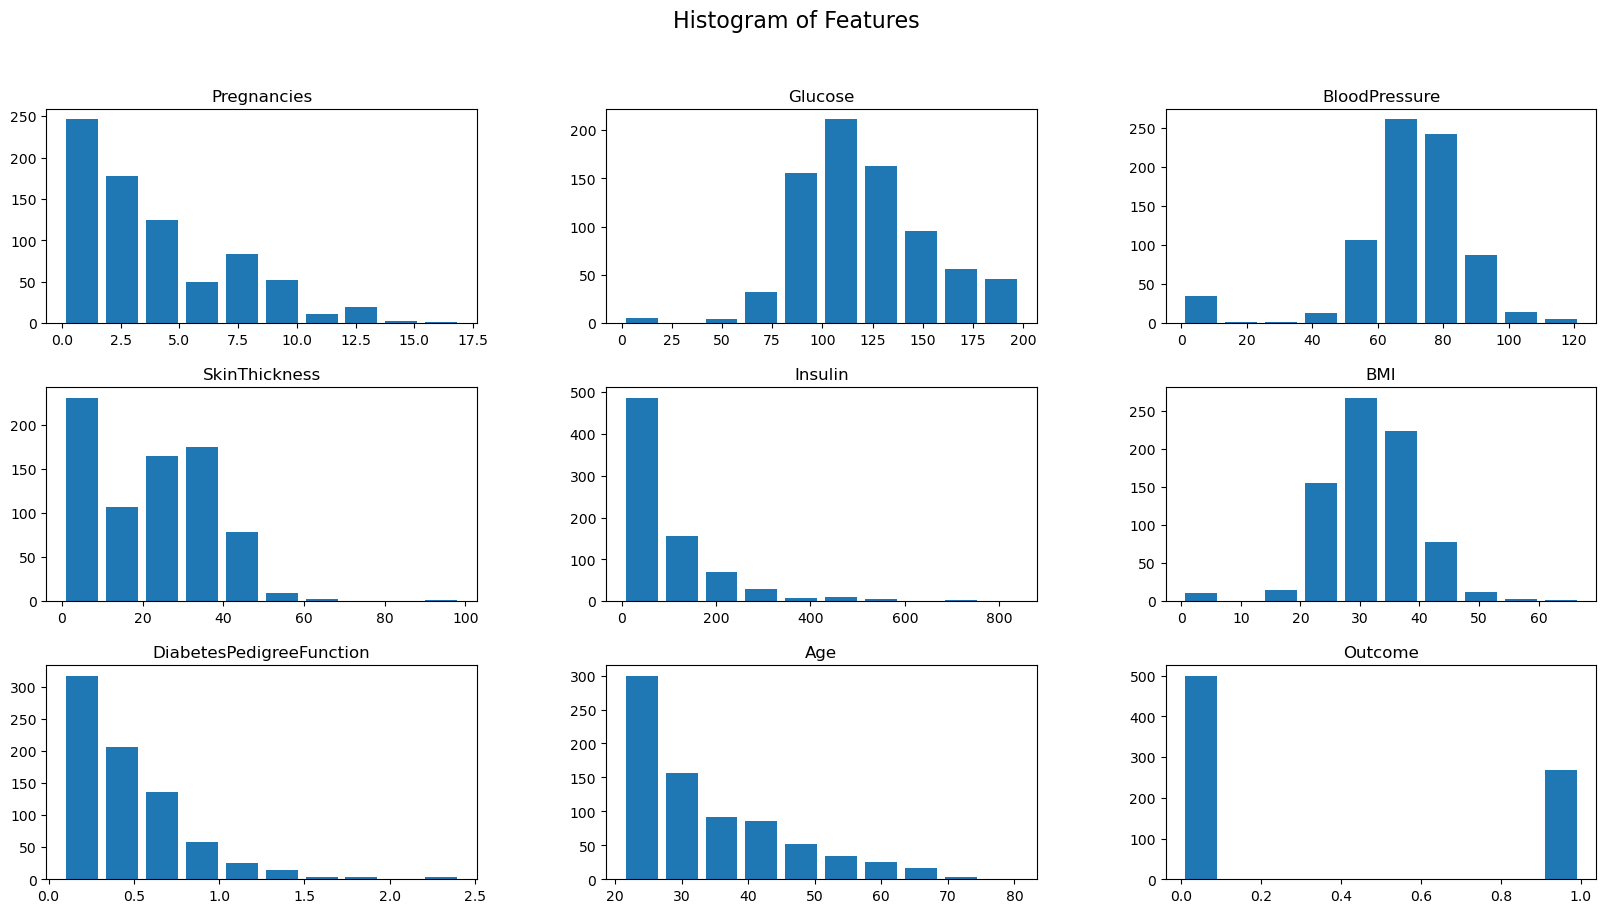

In [69]:
# --- 3. Univariate Analysis ---
df.hist(figsize=(20,10), grid=False, rwidth=0.8)
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

- Nhóm tuổi chiếm nhiều nhất là từ 20 – 30 tuổi.
- Glucose: phân bố nghiêng phải, tập trung nhiều nhất trong khoảng 90–140.
- BMI phân bố quanh 25–35, có đỉnh ở khoảng 30 (nhiều trường hợp thừa cân).
- - Có khoảng 500 người không mắc tiểu đường và khoảng 260 mắc bệnh tiểu đường (khoảng 34%), mất cân bằng dữ liệu cần oversampling, undersampling khi xây dựng mô hình phân loại
- Số lần mang thai phổ biến nhất là 0–2 lần mang thai.



## Phân tích đặc trưng theo Outcome (Feature-wise Analysis)
Ở bước này, chúng ta trực quan hóa từng biến đầu vào theo nhóm `Outcome` (0: không tiểu đường, 1: có tiểu đường) bằng biểu đồ boxplot.  
Mục tiêu là kiểm tra xem biến nào có sự khác biệt rõ rệt giữa hai nhóm, từ đó hỗ trợ chọn biến cho mô hình Machine Learning.
Mục đích: Xác định biến quan trọng để dùng cho mô hình


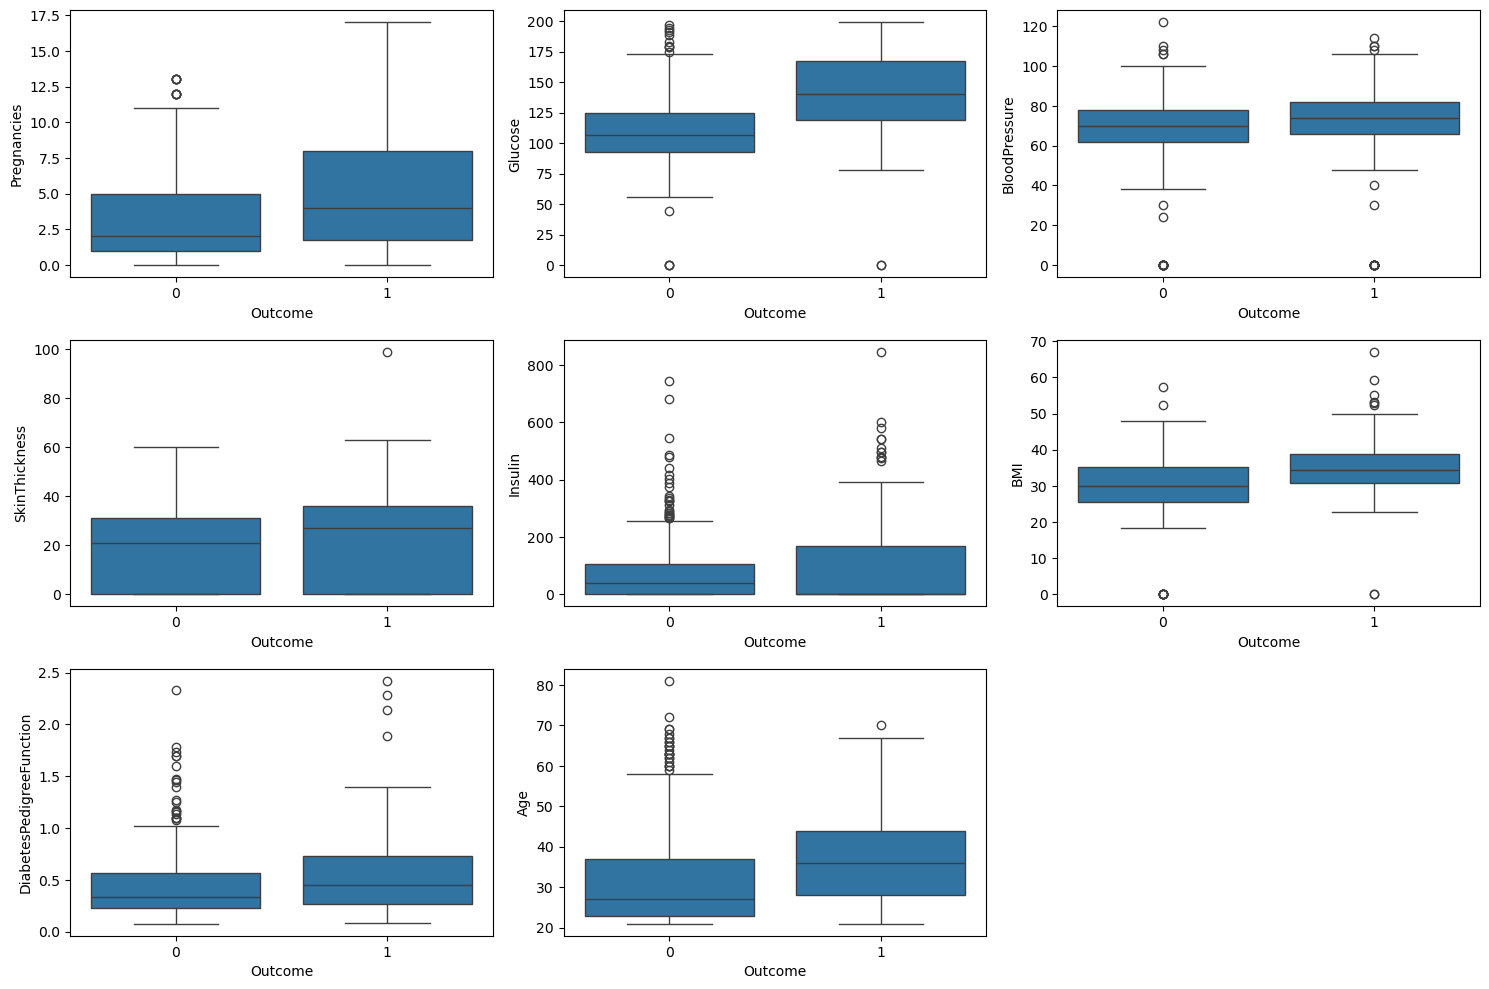

In [70]:
# --- 4. Feature-wise Analysis ---
num_cols = df.select_dtypes(include=np.number).columns.drop("Outcome")

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x="Outcome", y=col, data=df)
plt.tight_layout()
plt.show()

Người có Glucose cao dễ mắc tiểu đường hơn.
Người mắc tiểu đường thường có BMI cao hơn so với nhóm không bệnh.
Insulin có nhiều giá trị ngoại lai (outlier), phân bố rộng và chồng lấn giữa hai nhóm. Nhìn chung, Insulin không cho thấy sự khác biệt rõ ràng giữa Outcome 0 và 1, nên không phải yếu tố tách biệt tốt 
Hai median chênh không nhiều, chồng lấn mạnh. SkinThickness không tách biệt rõ rệt giữa người có và không có tiểu - đường.
Huyết áp trung bình không có sự khác biệt rõ rệt giữa người tiểu đường và không tiểu đường
Nhóm mắc bệnh có giá trị DiabetesPedigreeFunction nhỉnh hơn một chút, nhưng phân bố vẫn khá chồng lấn. Như vậy, chỉ số này có ảnh hưởng nhưng không mạnh bằng Glucose hay BMI.

### Phân tích kết quả
Các biến quan trọng nhất khi so sánh với Outcome: Glucose, BMI, Age, Pregnancies.
Các biến yếu hơn hoặc ít khác biệt: BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction.
Điều này phù hợp với y học: đường huyết cao, thừa cân, tuổi cao là yếu tố nguy cơ chính gây tiểu đường type 2.

## So sánh đặc trưng theo nhóm

### Trung bình Glucose, BMI, Insulin theo Outcome

Text(0.5, 1.0, 'Trung bình Glucose, BMI, Insulin theo Outcome')

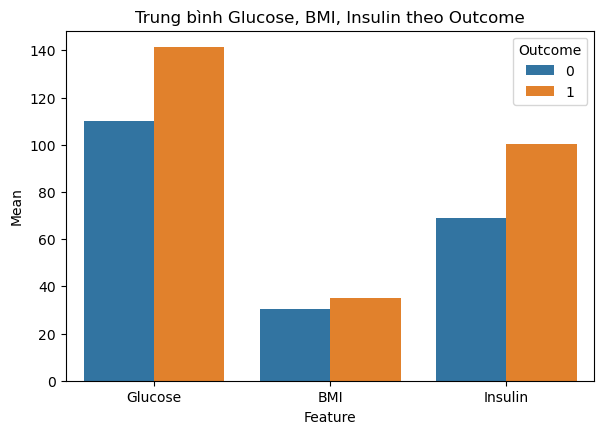

In [71]:
# --- Outcome-wise Mean Comparison ---
plt.figure(figsize=(15,10))

# 1. Trung bình Glucose, BMI, Insulin theo Outcome
plt.subplot(2,2,1)
mean_values = df.groupby("Outcome")[["Glucose","BMI","Insulin"]].mean().reset_index()
mean_values_melt = mean_values.melt(id_vars="Outcome", value_vars=["Glucose","BMI","Insulin"],
                                    var_name="Feature", value_name="Mean")
sns.barplot(data=mean_values_melt, x="Feature", y="Mean", hue="Outcome")
plt.title("Trung bình Glucose, BMI, Insulin theo Outcome")




####  Nhận xét:
- **Glucose**: Nhóm có tiểu đường có mức đường huyết trung bình cao hơn rõ rệt  
- **BMI**: Nhóm tiểu đường có chỉ số BMI cao hơn một chút  
- **Insulin**: Sự khác biệt rất lớn giữa hai nhóm → cho thấy Insulin là biến tiềm năng

→ Các đặc trưng này có thể đóng vai trò quan trọng trong việc phân loại nguy cơ tiểu đường.  
→ Glucose và Insulin đặc biệt nổi bật, nên được ưu tiên khi chọn biến cho mô hình ML.

### Số lần mang thai theo Outcome

Text(0.5, 1.0, 'Số lần mang thai theo Outcome')

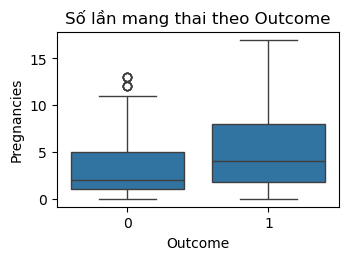

In [72]:
# 2. Trung bình số lần mang thai
plt.subplot(2,2,2)
sns.boxplot(data=df, x="Outcome", y="Pregnancies")
plt.title("Số lần mang thai theo Outcome")


- Nhóm Outcome = 1 có số lần mang thai trung bình và trung vị cao hơn nhóm không tiểu đường  
- Phân bố của nhóm tiểu đường rộng hơn, có nhiều người mang thai từ 10–15 lần  
- Nhóm không tiểu đường có nhiều outlier ở mức 8 lần mang thai  
- Biến `Pregnancies` có thể mang thông tin phân biệt, nhưng cần xử lý outlier cẩn thận

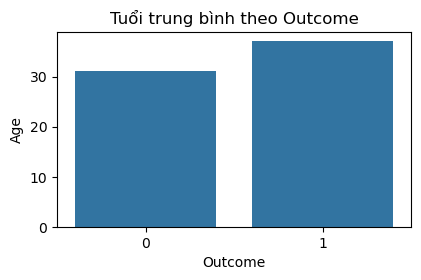

In [73]:
# 3. Tuổi trung bình khác nhau giữa hai nhóm
plt.subplot(2,2,3)
sns.barplot(data=df, x="Outcome", y="Age", estimator="mean", errorbar=None)
plt.title("Tuổi trung bình theo Outcome")

plt.tight_layout()
plt.show()

#### Nhận xét
Nhóm Outcome = 1 (có tiểu đường) có tuổi trung bình cao hơn (~37 tuổi)
Nhóm Outcome = 0 (không tiểu đường) có tuổi trung bình thấp hơn (~32 tuổi)
Biểu đồ không có sai lệch lớn hay outlier rõ rệt → dữ liệu tuổi khá ổn định.



## Phân tích theo từng đặc trưng (Feature-wise Deep Dive)

###  Phân tích theo tuổi (Age-wise Analysis)

#### Phân bố tuổi

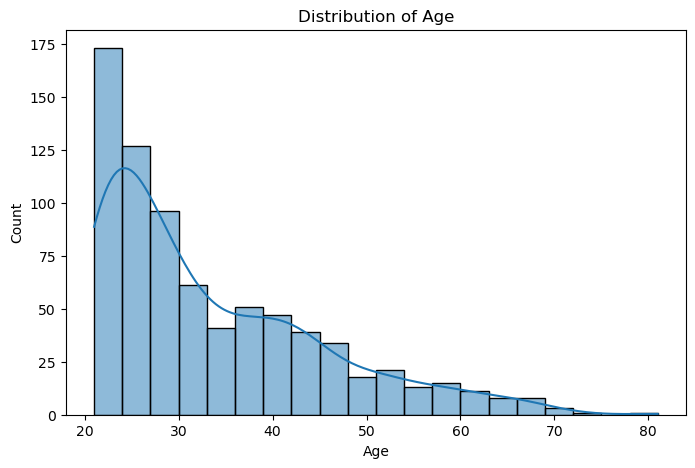

In [74]:

plt.rcParams["figure.figsize"] = (8,5)

# ---- AGE-WISE ANALYSIS ----

sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()


#### Nhóm tuổi với Outcome

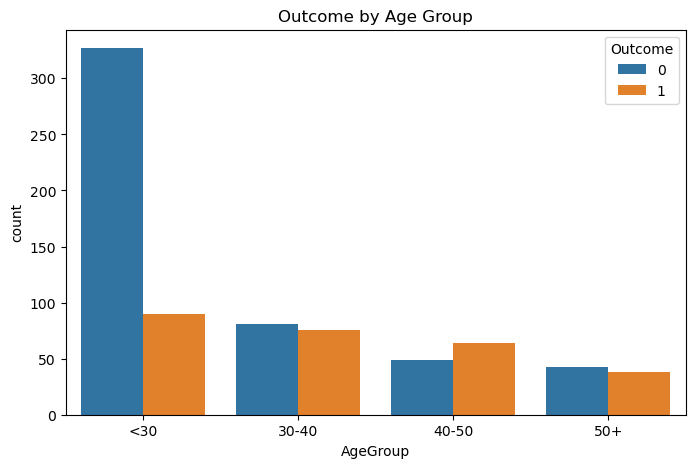

In [75]:
# 2. Nhóm tuổi vs Outcome
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,100], labels=["<30","30-40","40-50","50+"])
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title("Outcome by Age Group")
plt.show()

#### Glucose theo nhóm tuổi

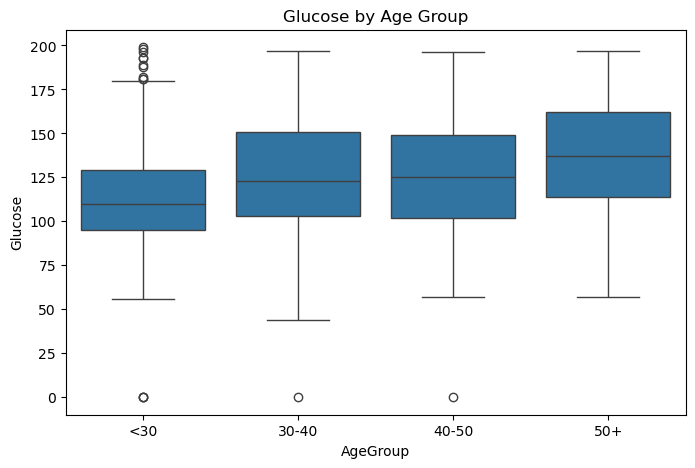

In [76]:
# 3. Glucose theo nhóm tuổi
sns.boxplot(x='AgeGroup', y='Glucose', data=df)
plt.title("Glucose by Age Group")
plt.show()

#### BMI theo nhóm tuổi

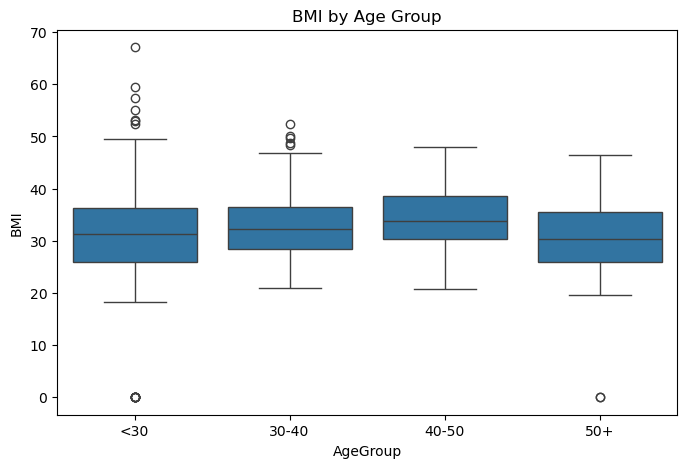

In [77]:
# 4. BMI theo nhóm tuổi
sns.boxplot(x='AgeGroup', y='BMI', data=df)
plt.title("BMI by Age Group")
plt.show()


#### Số lần mang thai theo nhóm tuổi

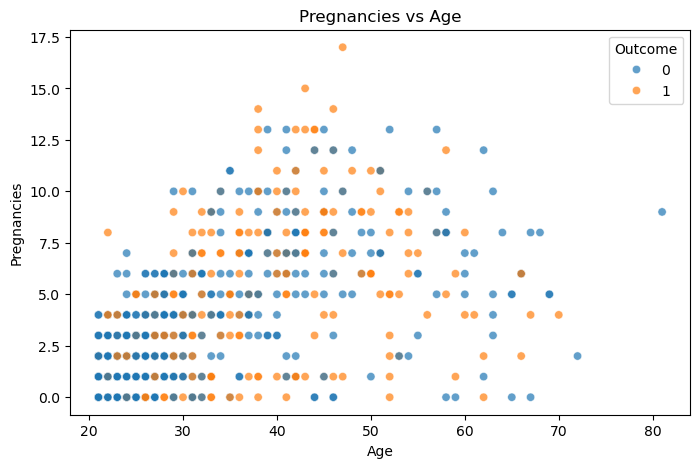

In [78]:
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df, alpha=0.7)
plt.title("Pregnancies vs Age")
plt.show()

### Phân tích theo số lần mang thai (Pregnancies-wise Analysis)

#### Phân bố số lần mang thai

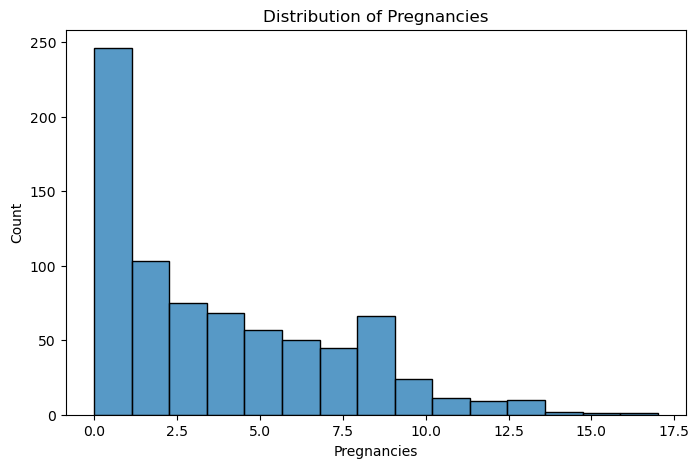

In [79]:
sns.histplot(df['Pregnancies'], bins=15, kde=False)
plt.title("Distribution of Pregnancies")
plt.show()


#### Outcome theo nhóm số lần mang thai

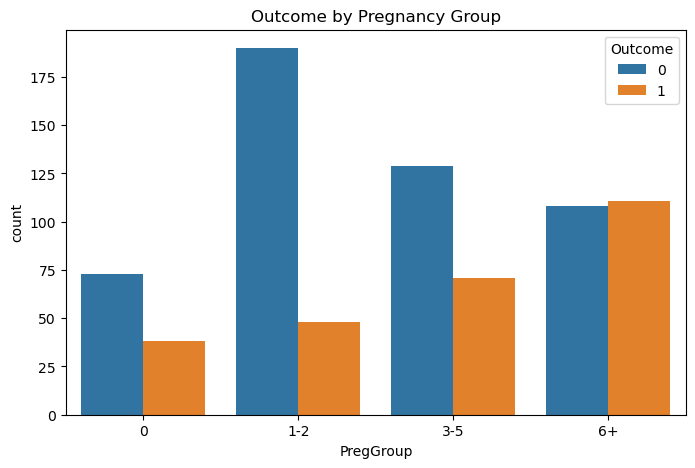

In [80]:
df['PregGroup'] = pd.cut(df['Pregnancies'], bins=[-1,0,2,5,20], labels=["0","1-2","3-5","6+"])
sns.countplot(x='PregGroup', hue='Outcome', data=df)
plt.title("Outcome by Pregnancy Group")
plt.show()

#### BMI theo nhóm số lần mang thai

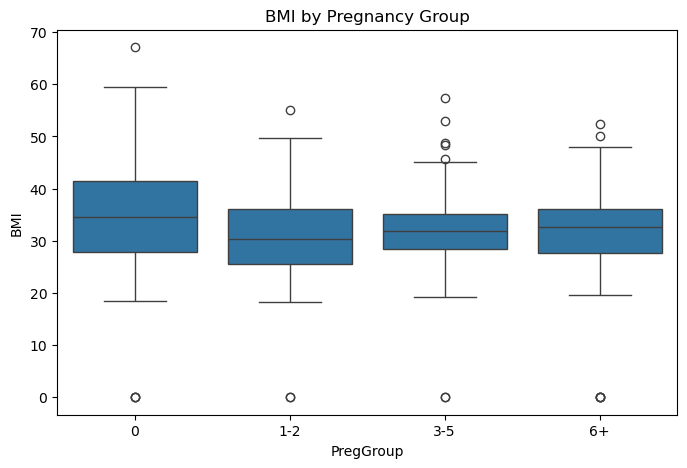

In [81]:
sns.boxplot(x='PregGroup', y='BMI', data=df)
plt.title("BMI by Pregnancy Group")
plt.show()

#### Glucose theo nhóm số lần mang thai

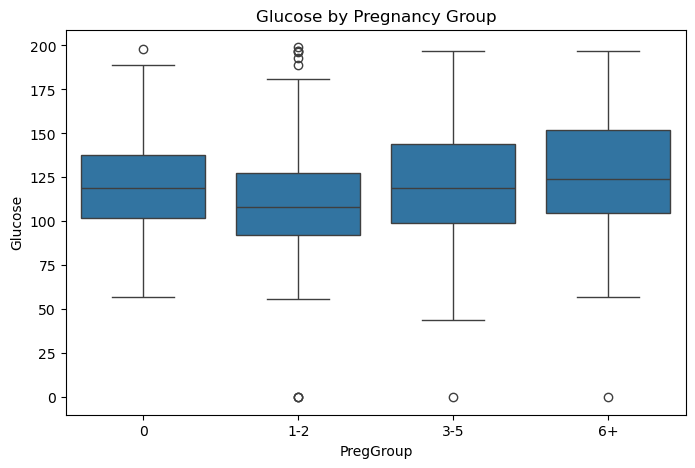

In [82]:
# 4. Glucose theo nhóm Pregnancies
sns.boxplot(x='PregGroup', y='Glucose', data=df)
plt.title("Glucose by Pregnancy Group")
plt.show()

#### Vẽ biểu đồ countplot phân theo Outcome

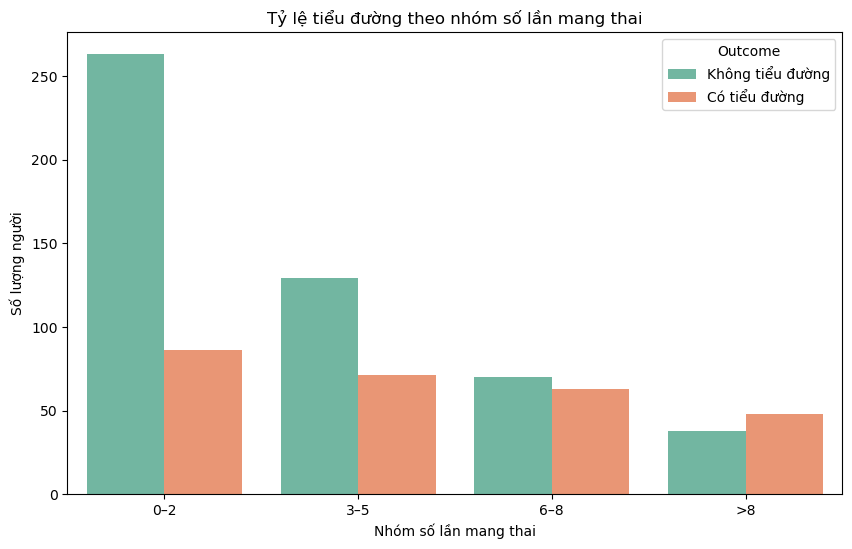

In [83]:

df['PregGroup'] = pd.cut(df['Pregnancies'],
                         bins=[-1, 2, 5, 8, 20],
                         labels=['0–2', '3–5', '6–8', '>8'])

plt.figure(figsize=(10,6))
sns.countplot(x='PregGroup', hue='Outcome', data=df, palette='Set2')
plt.title('Tỷ lệ tiểu đường theo nhóm số lần mang thai')
plt.xlabel('Nhóm số lần mang thai')
plt.ylabel('Số lượng người')
plt.legend(title='Outcome', labels=['Không tiểu đường', 'Có tiểu đường'])
plt.show()

#### Tính trung bình số lần mang thai theo Outcome

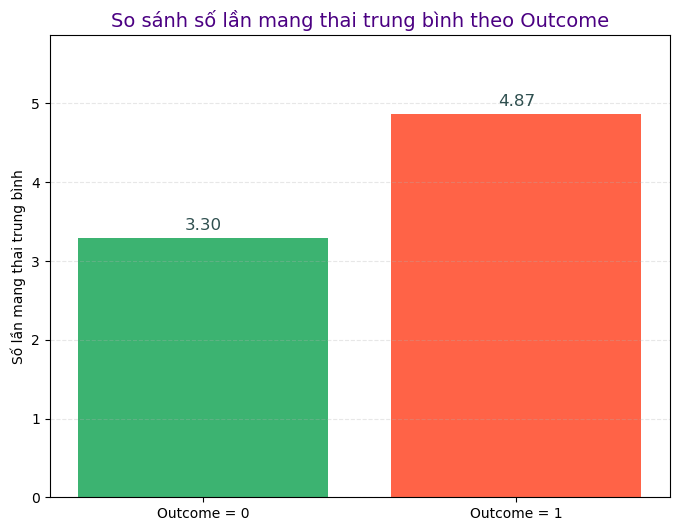

In [84]:

mean_preg = df.groupby('Outcome')['Pregnancies'].mean()

# Tạo dữ liệu cho biểu đồ
labels = ['Outcome = 0', 'Outcome = 1']
values = [mean_preg[0], mean_preg[1]]
colors = ['mediumseagreen', 'tomato']

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
bars = plt.bar(labels, values, color=colors)

# Thêm số lên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', fontsize=12, color='darkslategray')

# Trang trí
plt.title('So sánh số lần mang thai trung bình theo Outcome', fontsize=14, color='indigo')
plt.ylabel('Số lần mang thai trung bình')
plt.ylim(0, max(values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

### Phân tích theo BMI

#### Phân bố BMI

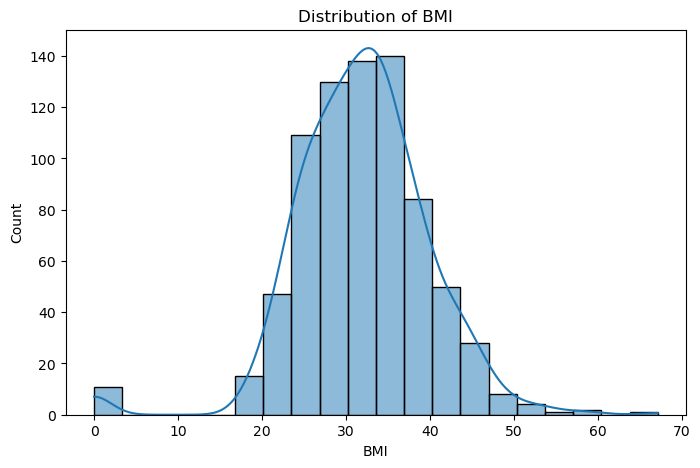

In [85]:
# 1. Phân bố BMI
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title("Distribution of BMI")
plt.show()


#### Outcome theo nhóm BMI

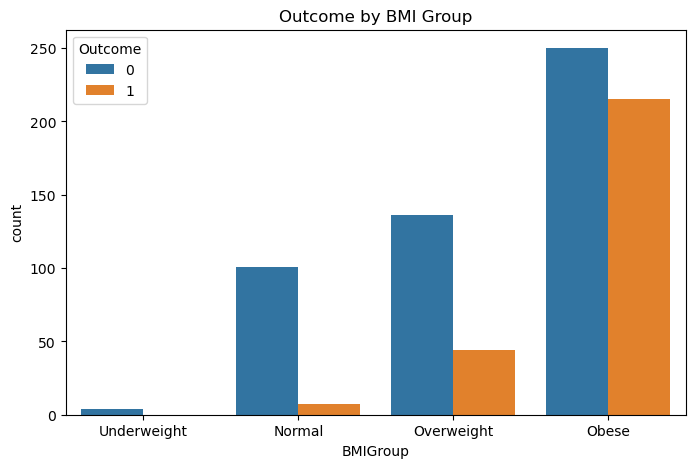

In [86]:

# 2. Outcome theo nhóm BMI
df['BMIGroup'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,70], labels=["Underweight","Normal","Overweight","Obese"])
sns.countplot(x='BMIGroup', hue='Outcome', data=df)
plt.title("Outcome by BMI Group")
plt.show()

#### GLucoso theo nhóm BMT

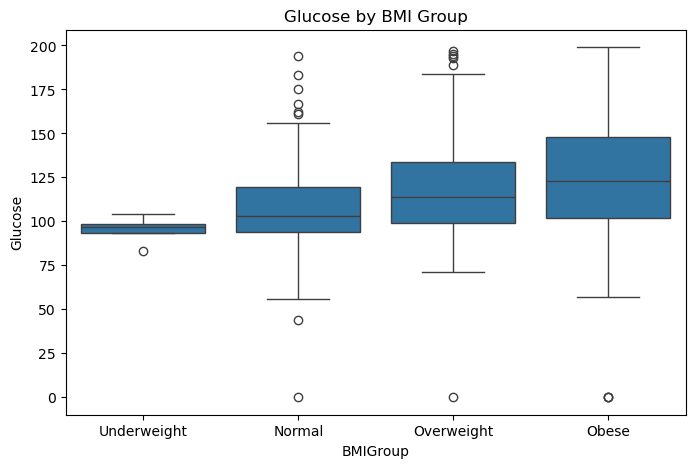

In [87]:

# 3. Glucose theo nhóm BMI
sns.boxplot(x='BMIGroup', y='Glucose', data=df)
plt.title("Glucose by BMI Group")
plt.show()

#### Số lần mang thai với BMI

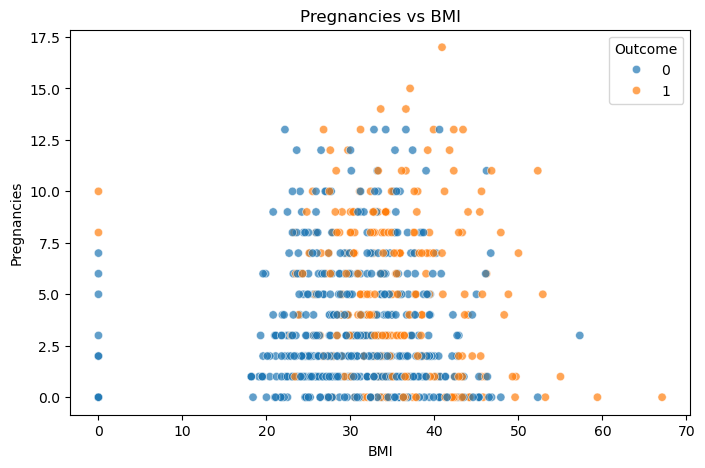

In [88]:
# 4. Pregnancies vs BMI
sns.scatterplot(x='BMI', y='Pregnancies', hue='Outcome', data=df, alpha=0.7)
plt.title("Pregnancies vs BMI")
plt.show()

#### Insulin theo nhóm BMI

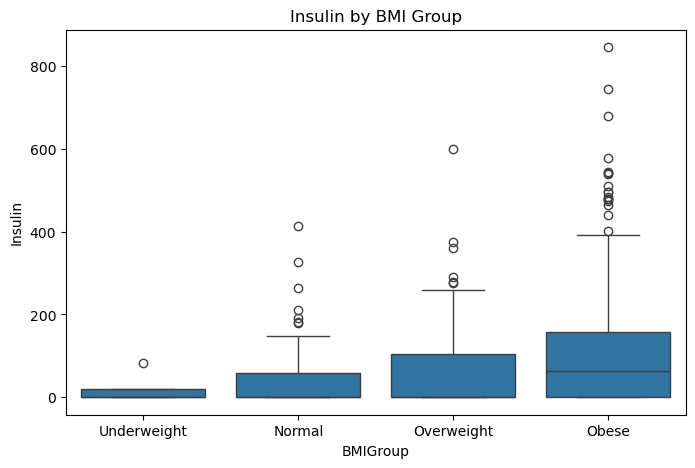

In [89]:
sns.boxplot(x='BMIGroup', y='Insulin', data=df)
plt.title("Insulin by BMI Group")
plt.show()

#### Ngưỡng BMI làm tăng nguy cơ tiểu đường

In [90]:
# Phân nhóm BMI theo chuẩn WHO
df['BMI_group'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                         labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Tính tỷ lệ phần trăm Outcome = 1 trong từng nhóm BMI
bmi_outcome_rate = df.groupby('BMI_group')['Outcome'].mean() * 100
print(bmi_outcome_rate.round(2))


BMI_group
Underweight     0.00
Normal          6.86
Overweight     22.35
Obese          46.40
Name: Outcome, dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_18816\1818805788.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_outcome_rate = df.groupby('BMI_group')['Outcome'].mean() * 100


#### Tỉ lệ mắc tiểu đường theo nhóm BMI

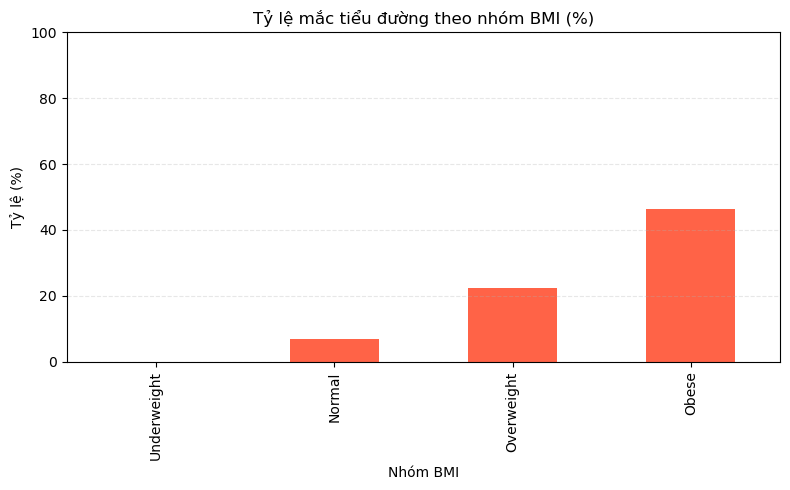

In [91]:
# Vẽ biểu đồ phần trăm Outcome = 1 theo nhóm BMI
bmi_outcome_rate.plot(kind='bar', color='tomato')
plt.title('Tỷ lệ mắc tiểu đường theo nhóm BMI (%)')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Nhóm BMI')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [92]:
bmi_0 = df[df['Outcome'] == 0]['BMI'].mean()
bmi_1 = df[df['Outcome'] == 1]['BMI'].mean()

print(f'BMI trung bình nhóm không tiểu đường: {bmi_0:.2f}')
print(f'BMI trung bình nhóm có tiểu đường: {bmi_1:.2f}')


BMI trung bình nhóm không tiểu đường: 30.30
BMI trung bình nhóm có tiểu đường: 35.14


#### Hệ số tương quan giữa BMI và Glucose

In [93]:

correlation = df['BMI'].corr(df['Glucose'])
print(f'Hệ số tương quan giữa BMI và Glucose: {correlation:.2f}')


Hệ số tương quan giữa BMI và Glucose: 0.22


#### Mối liên hệ giữa BMI và Glucose

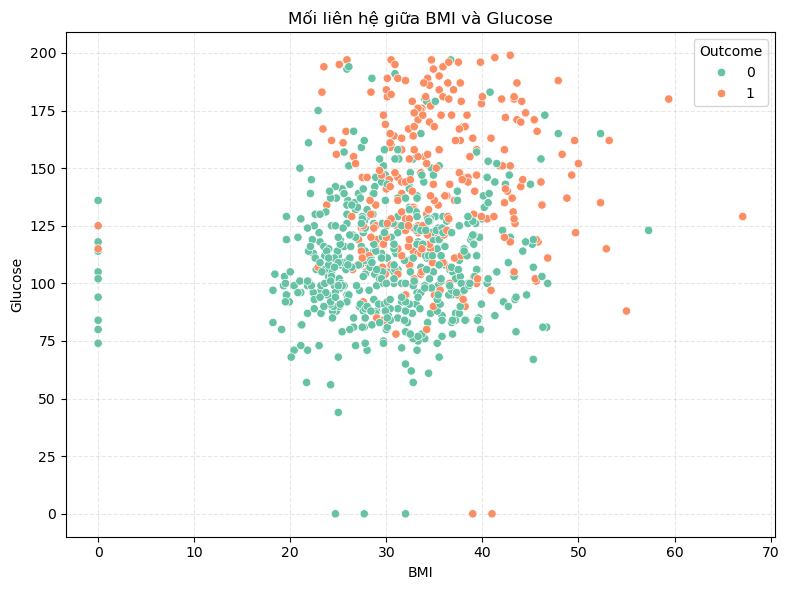

In [94]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='Set2')
plt.title('Mối liên hệ giữa BMI và Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Phân tích theo Glucoso

#### Phân bố Glucoso

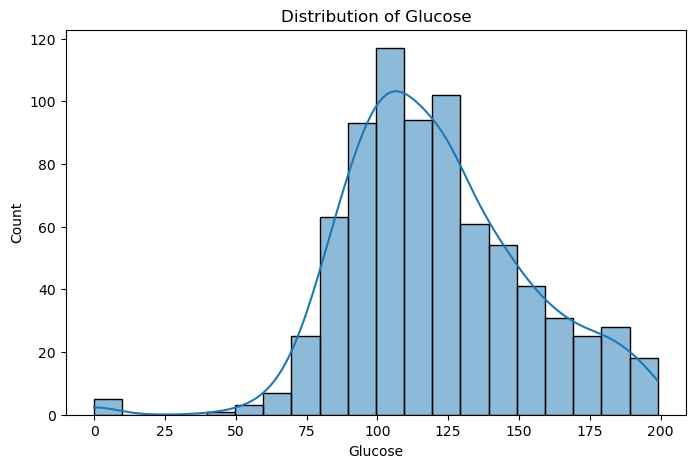

In [95]:
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title("Distribution of Glucose")
plt.show()


#### Outcome theo nhóm Glucose

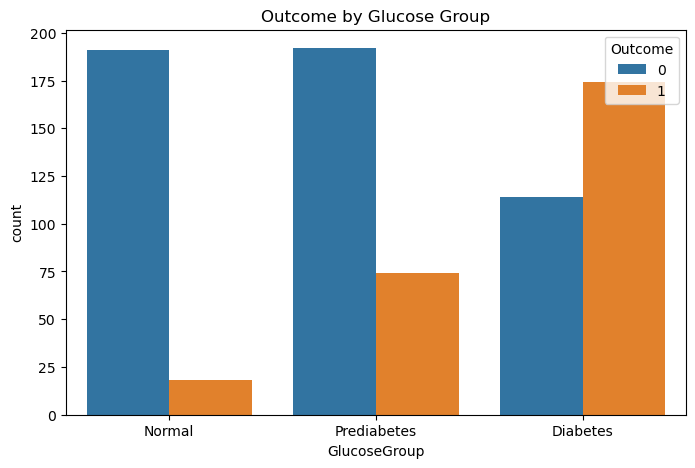

In [96]:
df['GlucoseGroup'] = pd.cut(df['Glucose'], bins=[0,100,126,200], labels=["Normal","Prediabetes","Diabetes"])
sns.countplot(x='GlucoseGroup', hue='Outcome', data=df)
plt.title("Outcome by Glucose Group")
plt.show()

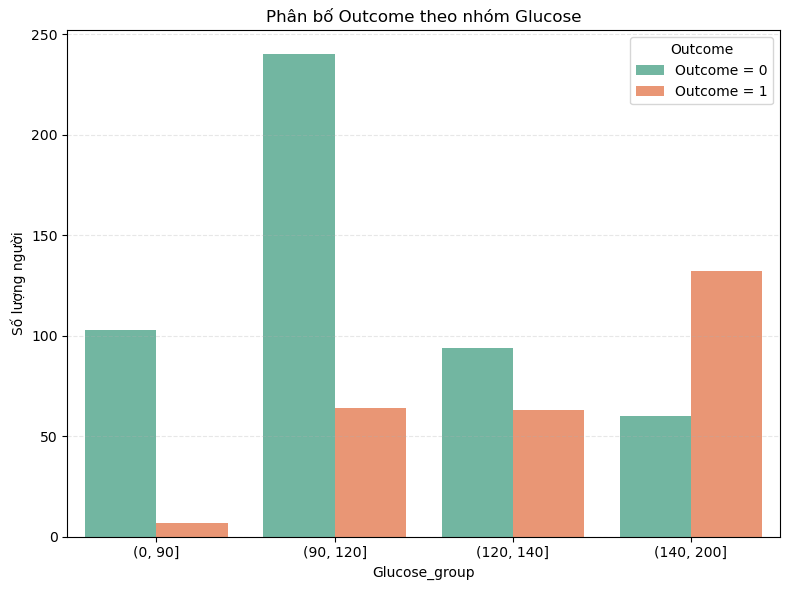

In [97]:
# Đẹp hơn
df['Glucose_group'] = pd.cut(df['Glucose'], bins=[0, 90, 120, 140, 200])

# Vẽ biểu đồ countplot
plt.figure(figsize=(8,6))
sns.countplot(x='Glucose_group', hue='Outcome', data=df, palette='Set2')

# Trang trí
plt.title('Phân bố Outcome theo nhóm Glucose')

plt.ylabel('Số lượng người')
plt.legend(title='Outcome', labels=['Outcome = 0', 'Outcome = 1'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### BMI theo nhóm Glucose

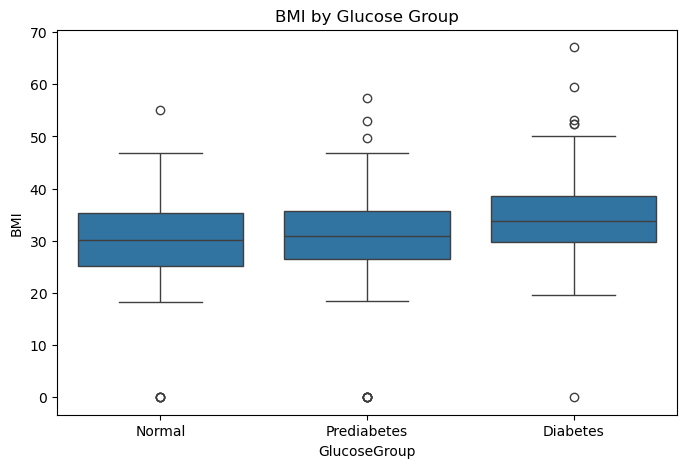

In [98]:
sns.boxplot(x='GlucoseGroup', y='BMI', data=df)
plt.title("BMI by Glucose Group")
plt.show()


#### Insulin theo nhóm Glucose

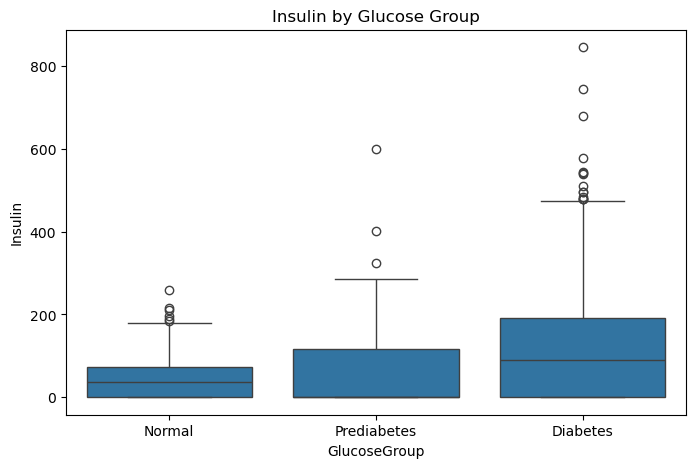

In [99]:
sns.boxplot(x='GlucoseGroup', y='Insulin', data=df)
plt.title("Insulin by Glucose Group")
plt.show()

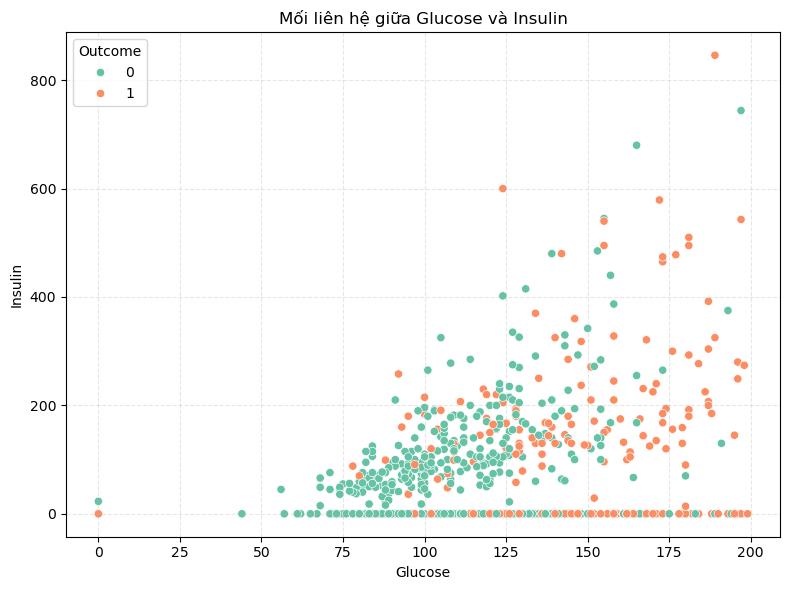

In [100]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', palette='Set2')
plt.title('Mối liên hệ giữa Glucose và Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### Glucose vs Age

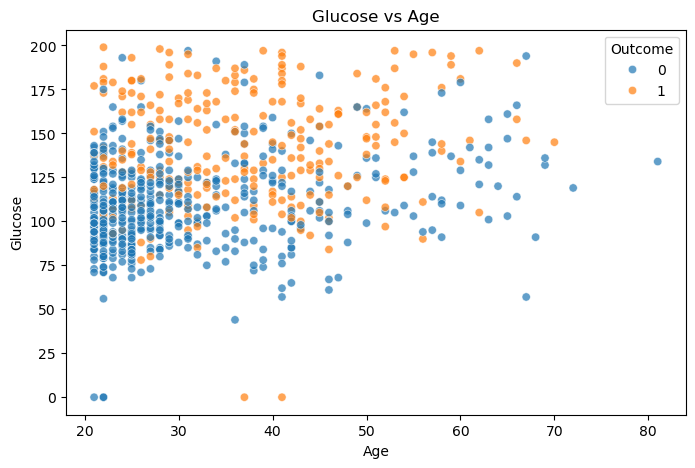

In [101]:

sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, alpha=0.7)
plt.title("Glucose vs Age")
plt.show()


#### Tương quan BMI - Glucose

In [102]:
# Tính hệ số tương quan giữa Insulin và Glucose
corr = df['Insulin'].corr(df['Glucose'])
print(f"Hệ số tương quan giữa Insulin và Glucose: {corr:.2f}")


Hệ số tương quan giữa Insulin và Glucose: 0.33


In [103]:
# Nhóm không tiểu đường
corr_0 = df[df['Outcome'] == 0]['BMI'].corr(df[df['Outcome'] == 0]['Glucose'])

# Nhóm có tiểu đường
corr_1 = df[df['Outcome'] == 1]['BMI'].corr(df[df['Outcome'] == 1]['Glucose'])

print(f'Tương quan BMI–Glucose nhóm không tiểu đường: {corr_0:.2f}')
print(f'Tương quan BMI–Glucose nhóm có tiểu đường: {corr_1:.2f}')


Tương quan BMI–Glucose nhóm không tiểu đường: 0.13
Tương quan BMI–Glucose nhóm có tiểu đường: 0.05


## Một số câu hỏi quan trọng

### Mối quan hệ giữa Glucose và BMI

Text(0.5, 1.0, 'Glucose vs BMI theo Outcome')

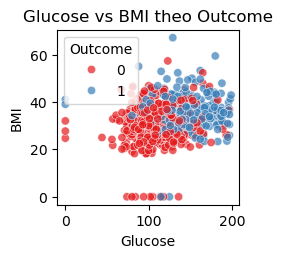

In [104]:
plt.subplot(231)
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", alpha=0.7, palette="Set1")
plt.title("Glucose vs BMI theo Outcome")

Nhóm Outcome = 1 tập trung ở vùng Glucose cao và BMI cao
Có xu hướng đồng biến nhẹ giữa Glucose và BMI
Cặp biến này có thể hỗ trợ phân loại tốt

### Mối quan hệ giữa Insulin và Glucose

Text(0.5, 1.0, 'Insulin vs Glucose theo Outcome')

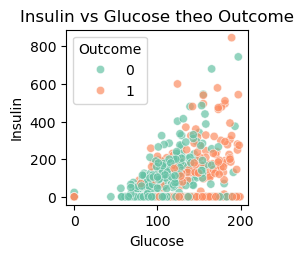

In [105]:
plt.subplot(232)
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Outcome", alpha=0.7, palette="Set2")
plt.title("Insulin vs Glucose theo Outcome")


Nhóm Outcome = 1 có xu hướng Insulin cao khi Glucose cao
Có nhiều điểm dữ liệu bị thiếu hoặc phân tán → cần xử lý kỹ Insulin
Mối quan hệ phi tuyến nhẹ → có thể cần biến đổi

### Mối quan hệ giữa Age và Pregnancies

Text(0.5, 1.0, 'Age vs Pregnancies theo Outcome')

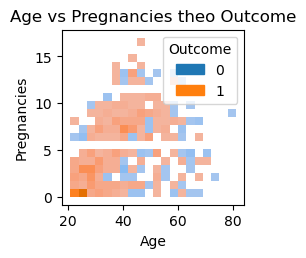

In [106]:
plt.subplot(233)
sns.histplot(data=df, x="Age", y="Pregnancies", hue="Outcome", bins=20, pmax=0.8)
plt.title("Age vs Pregnancies theo Outcome")

Tuổi càng cao thì số lần mang thai càng nhiều
Nhóm Outcome = 1 tập trung ở vùng tuổi cao và số lần mang thai cao
Có thể dùng kết hợp Age + Pregnancies để tăng độ phân biệt

### Mối quan hệ giữa BMI và Diabetes Pedigree Function

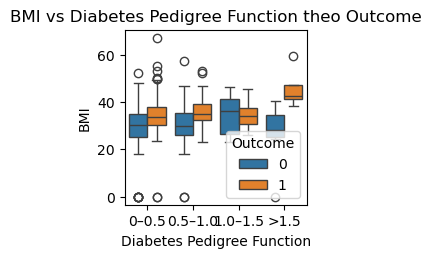

In [107]:
plt.subplot(234)
bins = [0, 0.5, 1.0, 1.5, df['DiabetesPedigreeFunction'].max()+0.1]
labels = ['0–0.5', '0.5–1.0', '1.0–1.5', '>1.5']
df['DPF_bin'] = pd.cut(df['DiabetesPedigreeFunction'], bins=bins, labels=labels, include_lowest=True)

sns.boxplot(x='DPF_bin', y='BMI', hue='Outcome', data=df)
plt.title("BMI vs Diabetes Pedigree Function theo Outcome")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("BMI")
plt.legend(title="Outcome")

Nhóm có DPF cao (>1.5) thường có BMI cao hơn
Nhóm Outcome = 1 có BMI cao hơn ở mọi mức DPF
DPF là biến tiềm năng, đặc biệt khi kết hợp với BMI

### Mối quan hệ giữa Glucose và Age

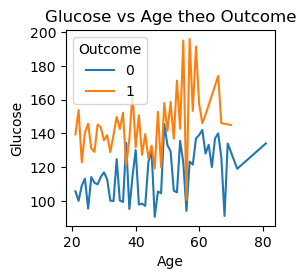

In [108]:
plt.subplot(235)
sns.lineplot(data=df, x="Age", y="Glucose", hue="Outcome", estimator="mean", errorbar=None)
plt.title("Glucose vs Age theo Outcome")
plt.xlabel("Age")
plt.ylabel("Glucose")

plt.tight_layout()
plt.show()

Kết luận: 
Glucose là yếu tố phân biệt mạnh nhất: người có Glucose cao dễ mắc tiểu đường.
BMI và Age cũng có ảnh hưởng rõ: BMI cao và tuổi lớn làm tăng nguy cơ mắc bệnh.
Pregnancies có vai trò nhất định, đặc biệt khi kết hợp với tuổi (phụ nữ lớn tuổi, nhiều lần mang thai → nguy cơ cao).
Diabetes Pedigree Function (DPF) góp phần bổ sung, nguy cơ tăng mạnh khi kết hợp với BMI cao.
BloodPressure, SkinThickness, Insulin có liên quan yếu đến Outcome, ít giá trị phân biệt.
Một số cặp biến có tương quan cao (multicollinearity) như SkinThickness–BMI, Pregnancies–Age.
Bộ dữ liệu mất cân bằng lớp (Outcome=0 chiếm đa số), cần xử lý khi huấn luyện mô hình.
-> Nhìn chung: Glucose, BMI, Age và Pregnancies là những đặc trưng quan trọng nhất để dự báo tiểu đường trong cộng đồng Pima Indians.

### Ma trận tương quan

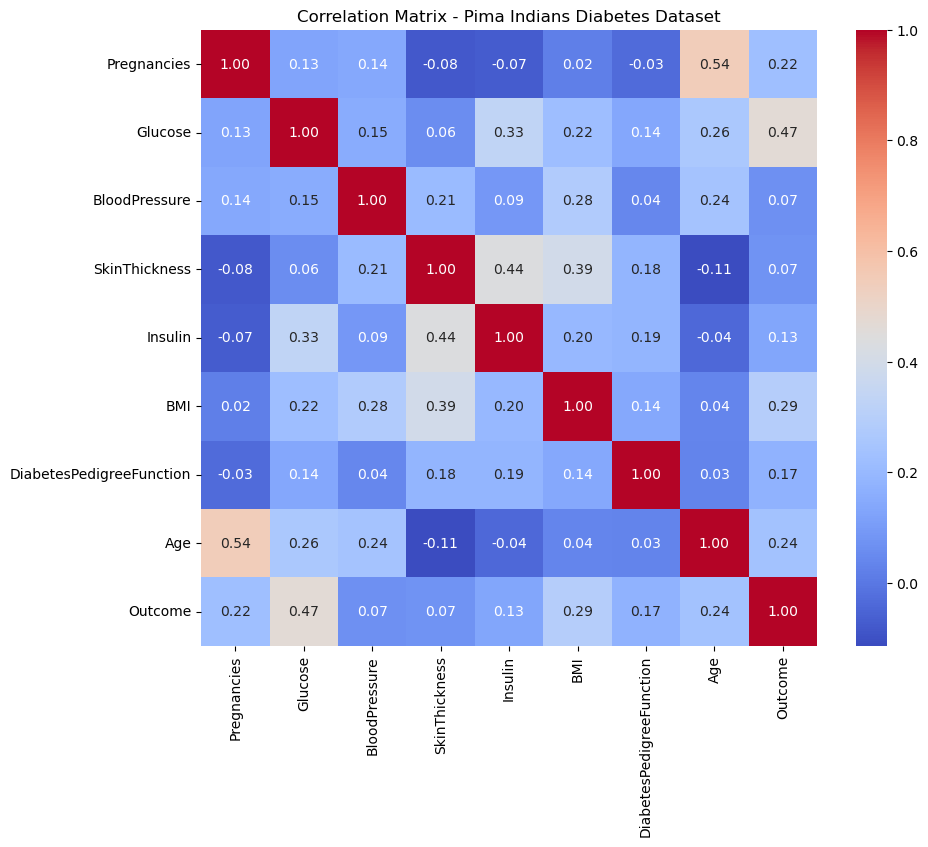

In [109]:
# --- Correlation Analysis ---
df_num = df.select_dtypes(include=[np.number])

corr = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix - Pima Indians Diabetes Dataset")
plt.show()

- **Glucose** có tương quan mạnh nhất với Outcome (~0.47) → biến quan trọng cho mô hình
- **BMI** và **Age** cũng có tương quan dương với Outcome (~0.31 và ~0.25)
- **Pregnancies** tương quan nhẹ với Age (~0.54) → hợp lý vì tuổi cao thường mang thai nhiều lần
- **Insulin** có tương quan thấp với Outcome → do nhiều giá trị thiếu
- Không có cặp biến nào bị tương quan quá cao (>0.8) → không lo vấn đề đa cộng tuyến

→ Các biến Glucose, BMI, Age, Pregnancies nên được ưu tiên trong quá trình chọn đặc trưng cho mô hình.